# Training a simple model on the MNIST dataset

In this notebook we are going to get familiar with using a deep learning library like Tensorflow to train a simple neural network. The network will be trained on the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) which contains small images of handwritten numerical digits. By the end of this training, the model should be able to accurately classify images with numerical digits.

Training a network on the MNIST dataset has become the 'hello world' of machine learning. 

The following is based on a notebook (see [here](https://github.com/fchollet/deep-learning-with-python-notebooks/tree/master)) originally by [François Chollet](https://twitter.com/fchollet), the creator of [Keras](https://keras.io/) a high-level neural network library that has been integrated into TensorFlow (lower level).

## Jupyter (Locally)

The recommended way is to clone the whole repo. You will need `tensorflow` and `matplotlib` installed. The same commands can be used as for Google Colab below, except in a terminal pointing to the repository, and without the leading `!`.

## Google Colab: Two Workflows

### 1. Clone the repo inside your Google Drive

For this, you need to mount your drive to the machine, like so:

```python
from google.colab import drive
drive.mount('/content/drive')

# change directory using the os module
import os
os.chdir('drive/My Drive/')
os.listdir()             # shows the contents of the current dir, you can use chdir again after that
# os.mkdir("DMLAP-2023") # creating a directory
# os.chdir("DMLAP-2023") # moving to this directory
# os.getcwd()            # printing the current directory
```

You can use git in Colab:
```python
!git clone https://github.com/jchwenger/DMLAP
```

To pull updates from the upstream repository without losing your work:
```python
!git stash     # temporary stashing away your changes
!git pull      # importing the update from github
!git stash pop # reimporting your changes, deleting the stash
```

### 2. Using this notebook as a standalone file

On Google Colab you will need to download things:

```python
!wget https://raw.githubusercontent.com/jchwenger/DMLAP/main/python/images.zip # Get required image files
!unzip images.zip
```

But to use the model created by this notebook in another notebook, you will need to either manually download/upload the model file (top left bar has a file explorer), or setup your notebook to mount (= connect to) a Google drive (using the code above).

See [this notebook](https://colab.research.google.com/notebooks/io.ipynb), and [Working With Files](https://realpython.com/working-with-files-in-python/) on Real Python.


## Imports

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Data processing: walkthrough

MNIST contains images of single digits, so 10 classes, from 0 to 9.

All images are 28 by 28 pixels, black and white (1 channel).

In [2]:
# Model / data parameters
NUM_CLASSES = 10
INPUT_SHAPE = (28*28,) # for a fully connected net, our image is just one array

In [4]:
# Load the data and split it between train and test sets
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

Why do we split our data like this? That is because we want to see how well our model performs on data *it was not trained on* (the test set)!

### A look at our data

In [19]:
print(train_images.shape, train_images.dtype)
print(train_labels.shape)

(60000, 28, 28) uint8
(60000,)


In [12]:
np.set_printoptions(linewidth=150) # prevent wrapping
print(f"This should be a {test_labels[0]}...")
print()
print(test_images[0])

This should be a 7

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 19

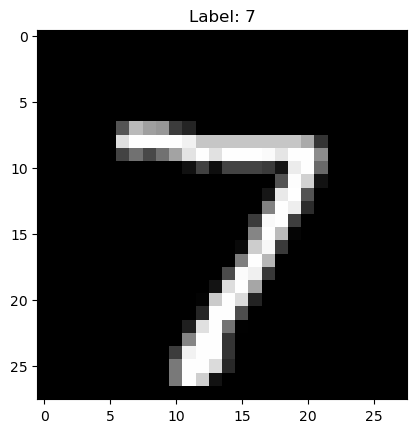

In [14]:
# We can also display the array as an image with matplotlib!
plt.figure()
plt.title(f"Label: {test_labels[0]}") # use the label in y_test
plt.imshow(test_images[0], cmap='gray')
plt.show()

In [15]:
# Scale images to the [0, 1] range
x_train = train_images.astype("float32") / 255
x_test = test_images.astype("float32") / 255

In [20]:
print(x_train.shape, x_train.dtype)
print("Our range is now:", x_train.min(), x_train.max())

(60000, 28, 28) float32
Our range is now: 0.0 1.0


In [21]:
# Make sure the images have a shape of (28, 28, 1), with a channel dim at the end
x_train = np.expand_dims(x_train, -1) # axis=-1: adding one axis in the last dimension
x_test = np.expand_dims(x_test, -1)   # note: the same could be done using x_train[..., None] / x_train[..., np.newaxis]

In [24]:
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Here we use the [to_categorical util function](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) in Keras to transform our class numbers into 'probabilities' (one slot for each class, zero everywhere, a 1 at the *index* of the class).

In [25]:
# convert class vectors to one-hot vectors
y_train = tf.keras.utils.to_categorical(train_labels, NUM_CLASSES)
y_test = tf.keras.utils.to_categorical(test_labels, NUM_CLASSES)

In [29]:
print("Before, we only had a number:")
print(train_labels[0])
print("Now, we have a vector with n_classes slot, and a 1 in the right class:")
print(y_train[0])

Before, we only had a number:
5
Now, we have a vector with n_classes slot, and a 1 in the right class:
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Technical Note

This transformation is related to how we design our system.

The loss `categorical_cross_entropy` (see below), expects labels in this form.

You could also keep your data as numbers, but then you need to tell Keras what to expect, and use the `sparse_categorical_cross_entropy`.

## All the code in one cell

In [38]:
# Model / data parameters
NUM_CLASSES = 10
INPUT_SHAPE = (28*28,)

# Load the data and split it between train and test sets
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = train_images.astype("float32") / 255
x_test = test_images.astype("float32") / 255

x_train = x_train.reshape(x_train.shape[0], -1) # this means "first dim to 60'000, and one more dim, automatically calculated (28*28 = 784)
x_test = x_test.reshape(x_test.shape[0], -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(train_labels, NUM_CLASSES)
y_test = tf.keras.utils.to_categorical(test_labels, NUM_CLASSES) 

x_train shape: (60000, 784)
60000 train samples
10000 test samples


## Our Workflow

1. **Model definition**: what kind of model do we want? Create a blueprint.
2. **Compilation**: tell TF to build the model for us.
3. **Test before training** (optional): how lousy are we before we start?
4. **Training**: aka 'fitting' the model to the data
5. **Testing**: how good are we now?

## Model definition

In [8]:
# Sequential is a basic model type with layers stacked upon each other
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=INPUT_SHAPE),        
        tf.keras.layers.Dense(128, activation="relu"),            # Dense means fully connected
        tf.keras.layers.Dense(64, activation="relu"),             # You can add more layers here, and change the number of units!
        tf.keras.layers.Dense(   # IMPORTANT:
            NUM_CLASSES,         # our last layer must have the same number of units as our classes and
            activation="softmax" # it needs the softmax activation to turn these into a probability distribution
        ),
    ]
)

model.summary() # 'None' means a variable dimension (here the batch size, that we can change!)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 64)                32832     
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 434947 (1.66 MB)
Trainable params: 434947 (1.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 2. Compilation

The **loss** is how we measure how good our performance is. `categorical_crossentropy` means:
- **categorical**: we are predicting one category in a set (classification)
- **crossentropy**: in probability, the cross-entropy loss is a measure of how two probability distributions differ. It calculates the 'distance' between our predictions (a probability distribution) and our labels (*also* a probability distribution, with a 1 where the ground truth is, and zero everywhere else).

The **optimizer** will take this loss, and change the parameters of the network in order to improve its preformance. The [Adam]() optimizer usually works well out of the box (although it requires a fair amount of memory). You can try different [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) from the TF API.

In [9]:
# Here we are defining the loss function and the optimiser used for training.
model.compile(
    loss="categorical_crossentropy", # if you use integers as labels, use sparse_categorical_crossentropy
    optimizer="adam",
    metrics=["accuracy"]
)

## 3. Before training: how good (bad) is our untrained model?

In [41]:
score = model.evaluate(x_test, y_test)

print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}") # a number around .1 means "about as random as it gets"
                                    # you'd expect .5 for a coin flip, and here our 'coin' has 10 faces/classes, so 1/10 chances

313/313 [==============================] - 2s 4ms/step - loss: 2.3161 - accuracy: 0.1070
Test loss: 2.316080331802368
Test accuracy: 0.10700000077486038


## 4. Training!

There are two parameters we need to define, the `batch_size` and the number of `epochs`.

The number of `epochs` defines how many iterations we perform over the dataset over training. The more epochs in training we perform, the longer training is going to take, but it often (but not always) leads to better performance.

The `batch_size` defines how many data samples we process in parallel during training, this helps speed up training if we use a bigger batch size (but is dependent on the size of the memory of our computer). Using a higher batch size generally leads to better results training, as the weights are updated based on the loss of the whole batch, which leads to more stable training than if we were to update the weights after each single example. Training in batches is a form of *regularisation* – something that will come up again and again with different tricks for getting the best performance out of training.

In [42]:
batch_size = 16 # depending on your memory, you can push that further up, 32, 64, 128, 256...
epochs = 5

history = model.fit( # in Keras, 'fitting' is used as a word for 'training'
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1
)

Epoch 1/5
3375/3375 [==============================] - 18s 5ms/step - loss: 0.1985 - accuracy: 0.9402 - val_loss: 0.0914 - val_accuracy: 0.9707
Epoch 2/5
3375/3375 [==============================] - 19s 6ms/step - loss: 0.0879 - accuracy: 0.9729 - val_loss: 0.0897 - val_accuracy: 0.9730
Epoch 3/5
3375/3375 [==============================] - 19s 6ms/step - loss: 0.0604 - accuracy: 0.9803 - val_loss: 0.0732 - val_accuracy: 0.9797
Epoch 4/5
3375/3375 [==============================] - 18s 5ms/step - loss: 0.0454 - accuracy: 0.9855 - val_loss: 0.0791 - val_accuracy: 0.9793
Epoch 5/5
3375/3375 [==============================] - 18s 5ms/step - loss: 0.0361 - accuracy: 0.9887 - val_loss: 0.0800 - val_accuracy: 0.9805


### Note: history & plotting

The `history` object contains all the data printed above in a dictionary (`history.history`), that can be plotted to see how the training went. For more, look at the bottom of this notebook.

## 5. After training: evaluating again (for real)

In [43]:
score = model.evaluate(x_test, y_test, verbose=0)

print(f"Test loss: {score[0]}")     # much, *much* lower than before!
print(f"Test accuracy: {score[1]}") # much, *much* better than before!

Test loss: 0.08688478171825409
Test accuracy: 0.977400004863739


## Using our model (with an actual input image)

If you are working on this just as a standalone notebook, you need to download the images first:

```python
!curl -O https://raw.githubusercontent.com/jchwenger/DMLAP/main/python/images.zip
!unzip -o images.zip

```

In [48]:
img = tf.keras.preprocessing.image.load_img('images/number3.png', target_size=(28, 28), color_mode='grayscale') # try also images/4.png
x = tf.keras.preprocessing.image.img_to_array(img) / 255
x = x.reshape(1, 28 * 28) # reshape to (1, 784)
print(x.shape)

predictions = model.predict(x, verbose=False)
print(f"Our predictions (shape {predictions.shape})")
print(predictions)

(28, 28, 1)
(1, 784)
Our predictions (shape (1, 10))
[[4.2522328e-24 1.5362029e-15 1.0222842e-11 1.0000000e+00 1.7388587e-25 4.3128601e-15 7.5097124e-30 6.6686762e-14 4.9868095e-15 3.7398483e-17]]


We can plot our predictions using a [bar chart](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) (sometimes the net is so confident that you will really see just one bar, the other numbers being so small!)

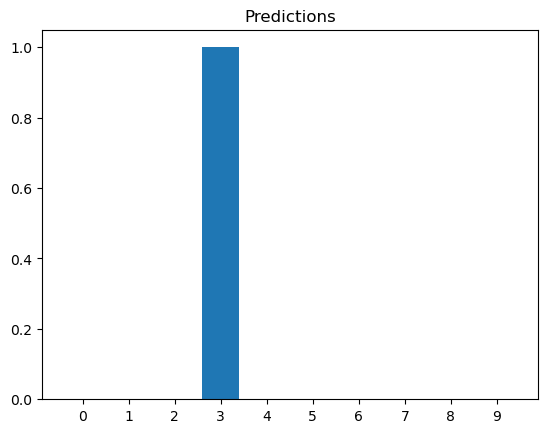

In [45]:
plt.figure()
plt.title("Predictions")
xs = np.arange(predictions.shape[-1])   # 0 to 9 for xs, our ys are our predictions
plt.bar(xs, predictions[0])             # a bar chart
plt.xticks(xs)
plt.show()

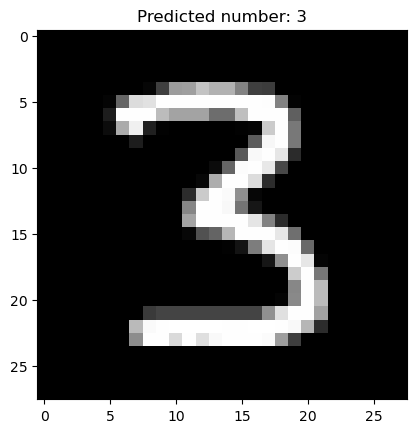

In [46]:
# note that predictions is still *batched* (shape: (1,10)), we need to fetch the first array
predicted = np.argmax(predictions[0]) # argmax: the *index* of the highest prediction

plt.figure()
plt.title(f'Predicted number: {predicted}') # use the predicted category in the title
plt.imshow(img, cmap='gray')
plt.show()

### Saving the model

This is where we save the trained model in the models folder to use it in the next notebook for more creative experimentations.

```python
model.save('./models/dense_mnist.keras')
```

To load a saved model, do this:

```python
model = tf.keras.models.load_model('models/dense_mnist.keras')
```

---

## Next steps

- Try and test your model with your own images of numbers (or pulled from the web)!
- Try **Fashion MNIST** instead, which works exactly the same way, but with items of clothing instead of numbers! (Can you modify the `matplotlib` code to display the correct class name?)
```python
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
# an array with the class names can be used for descriptions, (copied from the docs:
# https://complex-valued-neural-networks.readthedocs.io/en/latest/code_examples/fashion_mnist.html#Import-the-Fashion-MNIST-dataset)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
```

---

## Extra: plotting the history object

Here's a function that allows you to plot data from your history object.

```python
def plot_history(history):
    n_plots = 1 if "accuracy" in history.history.keys() else 2

    fig, axes = plt.subplots(1, n_plots, figsize=(10,4))

    # loss
    axes[0].set_title("Loss")
    axes[0].plot(history.history["loss"])
    # if there"s a val_loss, plot it in the same plot
    if "val_loss" in history.history.keys():
        axes[0].plot(history.history["val_loss"])
    
    # accuracy
    if n_plots == 2:
        axes[1].set_title("Accuracy")
        axes[1].plot(history.history["accuracy"])
        # if there"s a val_loss, plot it in the same plot
        if "val_accuracy" in history.history.keys():
            axes[1].plot(history.history["val_accuracy"])
        
    plt.show()
```

---

## Extra: a mini ConvNet

For those who feel like exploring the Deep, here's how you would go about replacing the fully connected network above by a small ConvNet:

A Convnet will not need images to be flattened, but it will need a channel dimension.

1. Make sure your `INPUT_SHAPE` is correctly defined as (w, h, channels):

```python
# INPUT_SHAPE = (28*28,)
INPUT_SHAPE = (28, 28, 1) # (w, h, channels)
```

2. Make sure your `x_train` and `x_test` are now (batch_size, w, h, channels):

```python
# x_train = x_train.reshape(x_train.shape[0], -1) # this means "first dim to 60'000, and one more dim, automatically calculated (28*28 = 784)
# x_test = x_test.reshape(x_test.shape[0], -1)

# Make sure images have shape (28, 28, 1)
# Expand dimensions from (60000, 28, 28) to (60000, 28, 28, 1). 
x_train = np.expand_dims(x_train, axis=-1) # axis=-1: add one more (channel) axis after the last dimension
x_test = np.expand_dims(x_test, axis=-1)
```

3. Change your model definition:

```python
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=INPUT_SHAPE),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"), # convolutions and maxpooling
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),                                         # flatten into one long array
        tf.keras.layers.Dropout(0.5),                                      # randomly zero out half (0.5 = 50%) of our units, good for training!
        tf.keras.layers.Dense(NUM_CLASSES, activation="softmax"),          # fully connected layer outputting a probability distribution over classes
    ]
)
```

Voilà! And lastly:

4. Whenever you load images, you must reshape them to be (1, 28, 28, 1) before feeding them to the model:

```python
x = image.img_to_array(img) / 255
# x = x.reshape(1, 28 * 28) # reshape to (1, 784)
x = np.expand_dims(x, 0) # reshape to (1, 28, 28, 1) (x[None, ...] would have worked as well)
print(x.shape) # must be (1, 28, 28, 1)
```

5. Save with a different name:

```python
model.save('./models/convnet_mnist.keras')
```

## ConvNet notes

- `kernel_size` defines your kernel, aka filter, by specifying the height and width of the matrix 'window' we slide over the image to detect features. Changing these sizes will affect the size of the next layer!
- `MaxPooling` is also a process of sliding through the input, and at each step takes only the maximum value. This is used to downsample!
- A deep CNN has convolutional layers stacked on top of each other. Each layer is made up of lots of different feature extractors, responding to different kinds of patterns. The output(s) of one layer becomes the input(s) to the next one.
- The `Flatten` layer converts the data into a 1D array. We flatten the output of the convolutional layers (of shape `(batch_size, w, h, channels)`) to create a single long feature vector `(batch_size, features)`.
- `Dropout` randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.

---

## Extra: Training on your own dataset!

Provided that you have images in a folder like this:
```bash
main_directory/
...class_a/
......a_image_1.jpg
......a_image_2.jpg
...class_b/
......b_image_1.jpg
......b_image_2.jpg
```

You can then replace `(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()` by
```python
# Model / data parameters
NUM_CLASSES = 3

train_dataset, test_dataset = tf.keras.utils.image_dataset_from_directory(
    "datasets/custom_mnist",
    color_mode="grayscale",
    image_size=(28, 28),
    validation_split=0.2,
    subset="both",
    shuffle=True,
    seed=42,
    labels="inferred",
    batch_size=None,
)

def preprocess(x, y):
    x = tf.reshape(tf.cast(x, tf.float32) / 255., INPUT_SHAPE)
    y = tf.one_hot(tf.cast(y, tf.int32), NUM_CLASSES)
    return x, y

batch_size = 16

# preprocess & batch
train_dataset = train_dataset.map(preprocess).batch(batch_size)

# split: 80% for partial_train, 20% for validation
n = int(train_dataset.cardinality().numpy() * .8) 
partial_train_dataset = train_dataset.take(n)
val_dataset = train_dataset.skip(n)
test_dataset = test_dataset.map(preprocess).batch(batch_size)
```

See [the documentation](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory).

You can then check the content of your dataset this way:

```python
for i, l in train_dataset.take(1):                     # Take just one batch
    i, l = i[0], l[0]
    print(i.shape, l)
    plt.figure()                                       # We can also display the array as an image with matplotlib!
    plt.title(f"Label: {tf.argmax(l).numpy().item()}") # convert one-hot back to an int with argmax
    plt.imshow(tf.reshape(i, (28,28)), cmap='gray')    # reshape to 28*28 pixels
    plt.show()    
```

The training no longer takes a `batch_size` argument, since we included this in the datasets themselves:
```python
epochs = 5

history = model.fit(
    partial_train_dataset,      # the train_dataset object provides both xs and ys
    epochs=epochs,
    validation_data=val_dataset # instead of a percentage, we provide the val_dataset
)
```

You can then look at a random image and how the net predicts its class like so:

```python
for images, labels in test_dataset.take(1):
    i, l = images[0], labels[0]
    print(i.shape, l)
    print(f"Using our model:")
    preds = model.predict(images[:1]) # [:1] instead of [0] preserves the batch dimension!
    top_pred = tf.argmax(preds[0]).numpy()
    print(f"Predictions: {preds[0]}, max at index: {top_pred}")
    # We can also display the array as an image with matplotlib!
    plt.figure()
    msg = f"Label: {tf.argmax(l).numpy()} | Predicted: {top_pred}"
    plt.title(msg) # use the label in y_test
    plt.imshow(tf.reshape(i, (28,28)), cmap='gray')
    plt.show()    
```